## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Get Data

In [ ]:
fashion_df = keras.datasets.fashion_mnist
( X_train , y_train ), ( X_test , y_test ) = fashion_df.load_data ()

X_train.shape , y_train.shape , X_test.shape , y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
print(fashion_df.load_data ())

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

9

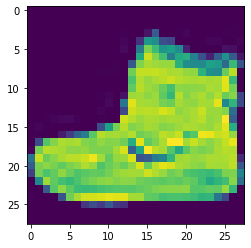

In [ ]:
image = X_train[0]
image_display = image.reshape(28,28)
plt.imshow(image_display)
y_train[0]


In [ ]:
X_train = pd.DataFrame(X_train.reshape(60000,784))
X_test = pd.DataFrame(X_test.reshape(10000,784))
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)




In [ ]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


In [ ]:
y_test.head()

,0
0,9
1,2
2,1
3,1
4,6


##Assignment

Above dataset has images of different types of merchandise (structure is the same as digit recognition dataset). Numerical labels correspond to the following types of goods - 
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

You are required to experiment with different classification models and select the best model for classification of images in the given dataset.

Through cross valiation assess if the results are consistent.

Perform hyperparameter tuning on the selected model(s).

You may refer to the digit classification exercise for getting guiance but try performing the entire sequence on your owns. 

## SGD Classifiers

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
lm = SGDClassifier(random_state=42)
lm.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
Prediction = lm.predict(X_test)
print(Prediction)
print(y_test.head())

[9 2 1 ... 8 1 5]
   0
0  9
1  2
2  1
3  1
4  6


In [ ]:
lm.score(X_test, y_test)

0.6767

In [ ]:
from sklearn import metrics
con_matrix = metrics.confusion_matrix(y_test, Prediction)
con_matrix = pd.DataFrame(con_matrix)
con_matrix.style.background_gradient(cmap = 'coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,786,31,46,2,44,0,55,0,36,0
1,4,966,13,0,13,0,2,0,2,0
2,7,4,839,2,103,0,24,0,21,0
3,120,353,67,197,233,0,22,0,8,0
4,1,8,233,0,731,0,14,0,13,0
5,1,0,0,0,0,584,3,39,237,136
6,176,13,299,1,333,0,107,0,71,0
7,0,0,0,0,0,9,0,603,65,323
8,1,3,3,1,5,0,17,3,966,1
9,0,0,1,1,1,1,0,2,6,988


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
con_matrix = confusion_matrix(y_test,Prediction)
print(con_matrix)
accuracy_test = accuracy_score(y_test,Prediction)
print("accuracy =",accuracy_test)

[[786  31  46   2  44   0  55   0  36   0]
 [  4 966  13   0  13   0   2   0   2   0]
 [  7   4 839   2 103   0  24   0  21   0]
 [120 353  67 197 233   0  22   0   8   0]
 [  1   8 233   0 731   0  14   0  13   0]
 [  1   0   0   0   0 584   3  39 237 136]
 [176  13 299   1 333   0 107   0  71   0]
 [  0   0   0   0   0   9   0 603  65 323]
 [  1   3   3   1   5   0  17   3 966   1]
 [  0   0   1   1   1   1   0   2   6 988]]
accuracy = 0.6767


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Prediction)
cm = pd.DataFrame(cm)
cm.style.background_gradient(cmap ='coolwarm')
print(cm)
accuracy_test = accuracy_score(y_test,Prediction)
print("accuracy =",accuracy_test)

     0    1    2    3    4    5    6    7    8    9
0  786   31   46    2   44    0   55    0   36    0
1    4  966   13    0   13    0    2    0    2    0
2    7    4  839    2  103    0   24    0   21    0
3  120  353   67  197  233    0   22    0    8    0
4    1    8  233    0  731    0   14    0   13    0
5    1    0    0    0    0  584    3   39  237  136
6  176   13  299    1  333    0  107    0   71    0
7    0    0    0    0    0    9    0  603   65  323
8    1    3    3    1    5    0   17    3  966    1
9    0    0    1    1    1    1    0    2    6  988
accuracy = 0.6767


In [ ]:
print(metrics.classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1000
           1       0.70      0.97      0.81      1000
           2       0.56      0.84      0.67      1000
           3       0.97      0.20      0.33      1000
           4       0.50      0.73      0.59      1000
           5       0.98      0.58      0.73      1000
           6       0.44      0.11      0.17      1000
           7       0.93      0.60      0.73      1000
           8       0.68      0.97      0.80      1000
           9       0.68      0.99      0.81      1000

    accuracy                           0.68     10000
   macro avg       0.72      0.68      0.64     10000
weighted avg       0.72      0.68      0.64     10000



In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lm, X_train, y_train, cv = 3, scoring = 'accuracy')
print (cvs)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/l

[0.83035 0.83545 0.83725]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
print('Score on Test Data ',' '*5, '%0.2f' %(lm.score(X_test, y_test)))
print('RMSE               ',' '*5, '%0.2f' %(np.sqrt(metrics.mean_squared_error(y_test, Prediction))))
print('Mean Absolute Error',' '*5, '%0.2f' %(metrics.mean_absolute_error(y_test, Prediction)))

Score on Test Data        0.68
RMSE                      1.77
Mean Absolute Error       42.78


# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
lm = SVC()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions)
con_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, predictions))
print(con_matrix)
print('Classification metrics for SVC classifier')
print()
print('Score on Test Data ',' '*5, '%0.2f' %(lm.score(X_test, y_test)))
print('RMSE               ',' '*5, '%0.2f' %(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('Mean Absolute Error',' '*5, '%0.2f' %(metrics.mean_absolute_error(y_test, predictions)))
print()
print("Classification report")
print()
print(con_matrix.style.background_gradient(cmap='coolwarm'))
print()
print((metrics.classification_report(y_test, predictions)))
print()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8 8 8 ... 8 8 8]
   0  1  2  3  4  5  6  7     8  9
0  0  0  0  0  0  0  0  0  1000  0
1  0  0  0  0  0  0  0  0  1000  0
2  0  0  0  0  0  0  0  0  1000  0
3  0  0  0  0  0  0  0  0  1000  0
4  0  0  0  0  0  0  0  0  1000  0
5  0  0  0  0  0  0  0  0  1000  0
6  0  0  0  0  0  0  0  0  1000  0
7  0  0  0  0  0  0  0  0  1000  0
8  0  0  0  0  0  0  0  0  1000  0
9  0  0  0  0  0  0  0  0  1000  0
Classification metrics for SVC classifier

Score on Test Data        0.10
RMSE                      4.53
Mean Absolute Error       29.10

Classification report


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
lm = DecisionTreeClassifier()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions)
con_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, predictions))
print(con_matrix)
print('Classification metrics for DecisionTreeClassifier')
print()
print('Score on Test Data ',' '*5, '%0.2f' %(lm.score(X_test, y_test)))
print('RMSE               ',' '*5, '%0.2f' %(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('Mean Absolute Error',' '*5, '%0.2f' %(metrics.mean_absolute_error(y_test, predictions)))
print()
print("Classification report")
print()
print(con_matrix.style.background_gradient(cmap='coolwarm'))
print()
print((metrics.classification_report(y_test, predictions)))
print()

[8 2 0 ... 2 2 8]
     0  1    2  3    4  5    6  7    8    9
0  143  0  287  0  406  0   67  0   88    9
1  817  0  133  0    0  0   50  0    0    0
2   47  0  759  0   20  0   63  0   10  101
3  451  0  431  0   17  0   95  0    5    1
4   46  0  788  0   14  0   83  0    2   67
5    6  0   89  0   14  0  102  0  781    8
6  110  0  629  0   71  0   53  0   46   91
7    0  0    6  0    2  0   17  0  975    0
8   35  0  501  0   12  0   45  0  406    1
9   15  0   59  0    7  0   63  0  844   12
Classification metrics for DecisionTreeClassifier

Score on Test Data        0.14
RMSE                      2.96
Mean Absolute Error       130.32

Classification report


              precision    recall  f1-score   support

           0       0.09      0.14      0.11      1000
           1       0.00      0.00      0.00      1000
           2       0.21      0.76      0.32      1000
           3       0.00      0.00      0.00      1000
           4       0.02      0.01      0.02      1000
  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
